In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/ml/train.csv')
test_dataset= pd.read_csv('/content/drive/MyDrive/ml/test.csv')

In [ ]:
train_dataset

,id,GENDER,AGE,Diabetes,Serum Creatinine Level,Obesity,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,Albumin-to-Creatinine Ratio,ALCOHOL CONSUMING,Blood Pressure,Blood Urea Nitrogen (BUN) Leve,Urinary Protein (Proteinuria):,Urinary Tract Infections,CKD_Disease
0,1,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,2,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,3,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,4,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,5,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,923,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
788,924,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
789,925,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
790,926,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
train_dataset.columns

Index(['id', 'GENDER', 'AGE', 'Diabetes', 'Serum Creatinine Level', 'Obesity',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
       'Albumin-to-Creatinine Ratio', 'ALCOHOL CONSUMING', 'Blood Pressure',
       'Blood Urea Nitrogen (BUN) Leve', 'Urinary Protein (Proteinuria): ',
       'Urinary Tract Infections ', 'CKD_Disease'],
      dtype='object')

In [ ]:
test_dataset

,id,GENDER,AGE,Diabetes,Serum Creatinine Level,Obesity,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,Albumin-to-Creatinine Ratio,ALCOHOL CONSUMING,Blood Pressure,Blood Urea Nitrogen (BUN) Leve,Urinary Protein (Proteinuria):,Urinary Tract Infections
0,209,M,67,1,2,2,2,1,2,2,1,1,2,1,2,1
1,210,M,55,2,1,1,1,1,2,2,2,2,2,2,1,2
2,211,M,54,2,1,1,1,1,1,2,2,2,2,1,1,1
3,212,F,77,1,2,2,2,2,2,2,2,1,2,2,2,2
4,213,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,294,F,56,2,2,2,1,1,2,2,1,1,1,2,1,2
86,295,M,67,1,1,1,2,1,2,1,2,1,2,2,1,2
87,296,F,54,2,2,2,1,2,1,1,2,2,1,2,2,2
88,297,M,63,1,2,1,1,1,2,1,2,2,2,2,1,1


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               792 non-null    int64 
 1   GENDER                           792 non-null    object
 2   AGE                              792 non-null    int64 
 3   Diabetes                         792 non-null    int64 
 4   Serum Creatinine Level           792 non-null    int64 
 5   Obesity                          792 non-null    int64 
 6   PEER_PRESSURE                    792 non-null    int64 
 7   CHRONIC DISEASE                  792 non-null    int64 
 8   FATIGUE                          792 non-null    int64 
 9   ALLERGY                          792 non-null    int64 
 10  Albumin-to-Creatinine Ratio      792 non-null    int64 
 11  ALCOHOL CONSUMING                792 non-null    int64 
 12  Blood Pressure                   792

In [ ]:
label_dataset = pd.read_csv('/content/drive/MyDrive/ml/output.csv')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_dataset['GENDER']= label_encoder.fit_transform(train_dataset['GENDER'])
train_dataset['CKD_Disease']= label_encoder.fit_transform(train_dataset['CKD_Disease'])

test_dataset['GENDER']= label_encoder.fit_transform(test_dataset['GENDER'])
label_dataset['CKD_Disease']= label_encoder.fit_transform(label_dataset['CKD_Disease'])

In [ ]:
train_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   id                               792 non-null    int64
 1   GENDER                           792 non-null    int64
 2   AGE                              792 non-null    int64
 3   Diabetes                         792 non-null    int64
 4   Serum Creatinine Level           792 non-null    int64
 5   Obesity                          792 non-null    int64
 6   PEER_PRESSURE                    792 non-null    int64
 7   CHRONIC DISEASE                  792 non-null    int64
 8   FATIGUE                          792 non-null    int64
 9   ALLERGY                          792 non-null    int64
 10  Albumin-to-Creatinine Ratio      792 non-null    int64
 11  ALCOHOL CONSUMING                792 non-null    int64
 12  Blood Pressure                   792 non-null    i

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   id                               90 non-null     int64
 1   GENDER                           90 non-null     int64
 2   AGE                              90 non-null     int64
 3   Diabetes                         90 non-null     int64
 4   Serum Creatinine Level           90 non-null     int64
 5   Obesity                          90 non-null     int64
 6   PEER_PRESSURE                    90 non-null     int64
 7   CHRONIC DISEASE                  90 non-null     int64
 8   FATIGUE                          90 non-null     int64
 9   ALLERGY                          90 non-null     int64
 10  Albumin-to-Creatinine Ratio      90 non-null     int64
 11  ALCOHOL CONSUMING                90 non-null     int64
 12  Blood Pressure                   90 non-null     int

In [ ]:
train_dataset.describe()

,id,GENDER,AGE,Diabetes,Serum Creatinine Level,Obesity,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,Albumin-to-Creatinine Ratio,ALCOHOL CONSUMING,Blood Pressure,Blood Urea Nitrogen (BUN) Leve,Urinary Protein (Proteinuria):,Urinary Tract Infections,CKD_Disease
count,792.000000,792.000000,792.00000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,455.818182,0.522727,62.52399,1.570707,1.569444,1.501263,1.491162,1.500000,1.670455,1.551768,1.554293,1.555556,1.580808,1.652778,1.477273,1.558081,0.869949
std,288.450260,0.499799,8.24357,0.495288,0.495467,0.500314,0.500238,0.500316,0.470345,0.497627,0.497358,0.497218,0.493739,0.476388,0.499799,0.496929,0.336572
min,1.000000,0.000000,21.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,198.750000,0.000000,57.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,396.500000,1.000000,62.00000,2.000000,2.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,729.250000,1.000000,69.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,927.000000,1.000000,87.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
train_dataset.corr()

,id,GENDER,AGE,Diabetes,Serum Creatinine Level,Obesity,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,Albumin-to-Creatinine Ratio,ALCOHOL CONSUMING,Blood Pressure,Blood Urea Nitrogen (BUN) Leve,Urinary Protein (Proteinuria):,Urinary Tract Infections,CKD_Disease
id,1.000000,0.003887,0.015318,-0.002317,-0.006962,0.006651,0.013420,-0.011791,0.025146,0.018958,-0.001526,-0.007545,0.005509,-0.003809,-0.013621,-0.017663,0.023482
GENDER,0.003887,1.000000,0.021193,0.044571,-0.213143,-0.149259,-0.279832,-0.202229,-0.094480,0.150296,0.150147,0.468025,0.135994,-0.080972,-0.078905,0.386623,0.073958
AGE,0.015318,0.021193,1.000000,-0.088507,0.011044,0.054861,0.023964,-0.017625,0.018833,0.023735,0.066902,0.054730,0.183247,-0.017352,-0.008306,0.004752,0.091572
Diabetes,-0.002317,0.044571,-0.088507,1.000000,-0.017459,0.155244,-0.045949,-0.127544,-0.032808,0.003083,-0.136209,-0.026238,-0.131959,0.058641,0.037142,0.121980,0.074191
Serum Creatinine Level,-0.006962,-0.213143,0.011044,-0.017459,1.000000,0.586140,0.334027,0.038250,-0.126807,-0.153041,-0.082013,-0.274832,-0.010049,-0.114635,0.381614,-0.106260,0.186895
Obesity,0.006651,-0.149259,0.054861,0.155244,0.586140,1.000000,0.237456,-0.012626,-0.188948,-0.167831,-0.193337,-0.160365,-0.217920,-0.149328,0.513273,-0.104537,0.154883
PEER_PRESSURE,0.013420,-0.279832,0.023964,-0.045949,0.334027,0.237456,1.000000,0.047987,0.076262,-0.079417,-0.064126,-0.158131,-0.071324,-0.222442,0.380963,-0.102190,0.207165
CHRONIC DISEASE,-0.011791,-0.202229,-0.017625,-0.127544,0.038250,-0.012626,0.047987,1.000000,-0.110133,0.109173,-0.058426,-0.005082,-0.174005,-0.018565,0.065724,-0.040679,0.116368
FATIGUE,0.025146,-0.094480,0.018833,-0.032808,-0.126807,-0.188948,0.076262,-0.110133,1.000000,-0.005340,0.127922,-0.205420,0.139314,0.453489,-0.147525,-0.028889,0.136216
ALLERGY,0.018958,0.150296,0.023735,0.003083,-0.153041,-0.167831,-0.079417,0.109173,-0.005340,1.000000,0.172517,0.333249,0.186197,-0.049403,-0.079134,0.230665,0.315756


<Axes: title={'center': 'Affected(1) vs Healthy(0)'}, xlabel='Output class', ylabel='Count'>

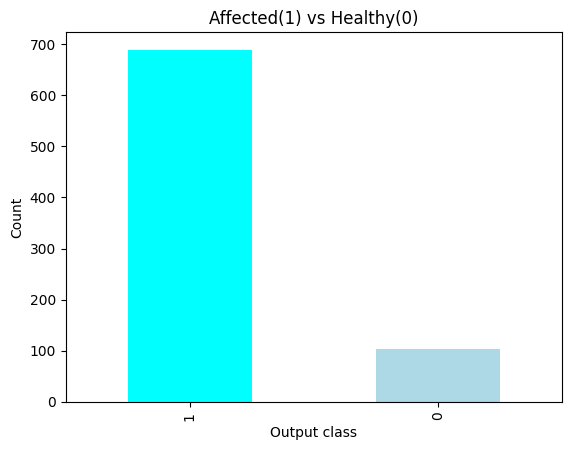

In [ ]:
train_dataset.CKD_Disease.value_counts().plot.bar(color=['cyan', 'lightblue'],title="Affected(1) vs Healthy(0)", xlabel="Output class", ylabel = "Count")

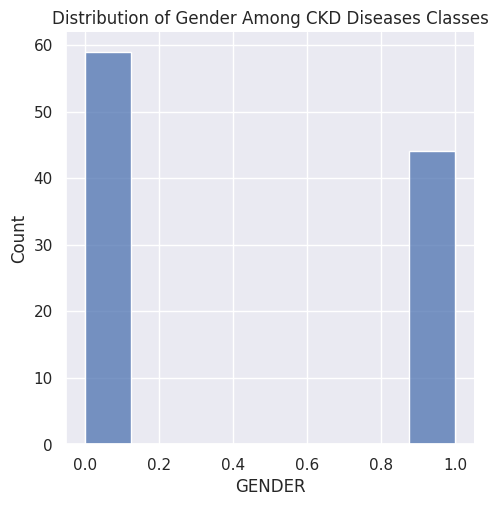

In [ ]:
temp = train_dataset.query('CKD_Disease == 0')
sns.set_theme()
sns.displot(data=temp.GENDER).set(title="Distribution of Gender Among CKD Diseases Classes", xlabel="GENDER")

In [ ]:
train_dataset

,id,GENDER,AGE,Diabetes,Serum Creatinine Level,Obesity,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,Albumin-to-Creatinine Ratio,ALCOHOL CONSUMING,Blood Pressure,Blood Urea Nitrogen (BUN) Leve,Urinary Protein (Proteinuria):,Urinary Tract Infections,CKD_Disease
0,1,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,2,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,3,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,4,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,5,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,923,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
788,924,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
789,925,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
790,926,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   id                               792 non-null    int64
 1   GENDER                           792 non-null    int64
 2   AGE                              792 non-null    int64
 3   Diabetes                         792 non-null    int64
 4   Serum Creatinine Level           792 non-null    int64
 5   Obesity                          792 non-null    int64
 6   PEER_PRESSURE                    792 non-null    int64
 7   CHRONIC DISEASE                  792 non-null    int64
 8   FATIGUE                          792 non-null    int64
 9   ALLERGY                          792 non-null    int64
 10  Albumin-to-Creatinine Ratio      792 non-null    int64
 11  ALCOHOL CONSUMING                792 non-null    int64
 12  Blood Pressure                   792 non-null    i

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   id                               90 non-null     int64
 1   GENDER                           90 non-null     int64
 2   AGE                              90 non-null     int64
 3   Diabetes                         90 non-null     int64
 4   Serum Creatinine Level           90 non-null     int64
 5   Obesity                          90 non-null     int64
 6   PEER_PRESSURE                    90 non-null     int64
 7   CHRONIC DISEASE                  90 non-null     int64
 8   FATIGUE                          90 non-null     int64
 9   ALLERGY                          90 non-null     int64
 10  Albumin-to-Creatinine Ratio      90 non-null     int64
 11  ALCOHOL CONSUMING                90 non-null     int64
 12  Blood Pressure                   90 non-null     int

In [ ]:
label_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           90 non-null     int64
 1   CKD_Disease  90 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


In [ ]:
X_train = train_dataset.iloc[:, 1:16].values
y_train = train_dataset.iloc[:, 16].values

In [ ]:
X_test = test_dataset.iloc[:, 1:].values
y_test = label_dataset.iloc[:, 1].values

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(792, 15)
(792,)
(90, 15)
(90,)


LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.9555555555555556
F1 score:  0.9743589743589742
Precision score:  0.9620253164556962
Recall score:  0.987012987012987


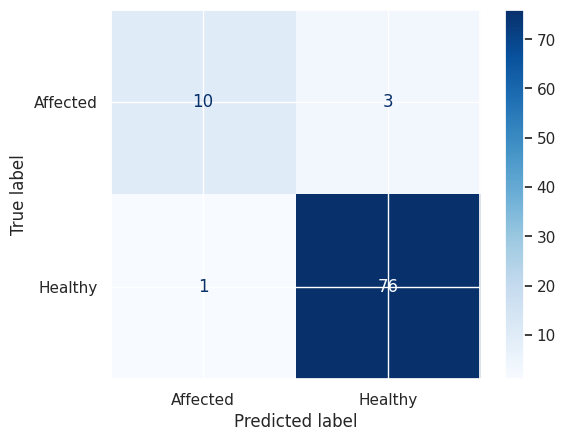

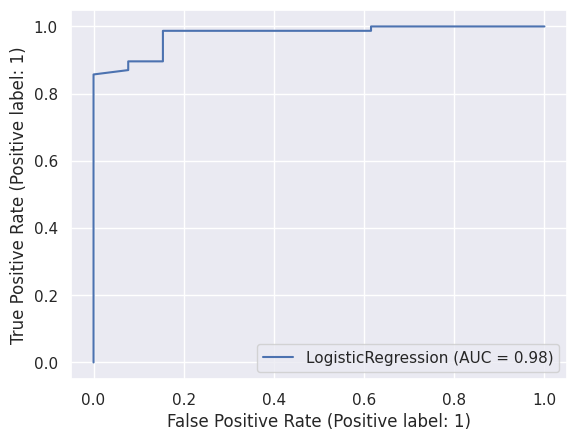

In [ ]:
clf = LogisticRegression(random_state = 0,C=2,penalty= 'l2').fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

SVM


Accuracy score:  0.9666666666666667
F1 score:  0.9806451612903225
Precision score:  0.9743589743589743
Recall score:  0.987012987012987


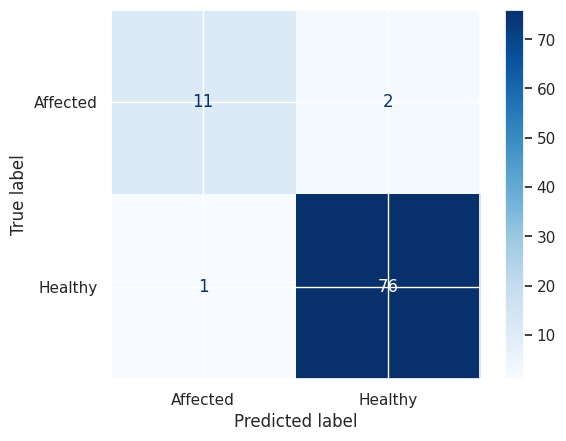

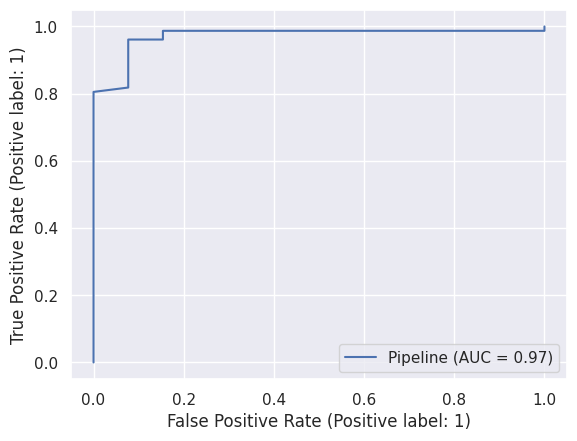

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear',C = 0.1))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

GaussianNB

Accuracy score:  0.9333333333333333
F1 score:  0.9615384615384615
Precision score:  0.9493670886075949
Recall score:  0.974025974025974


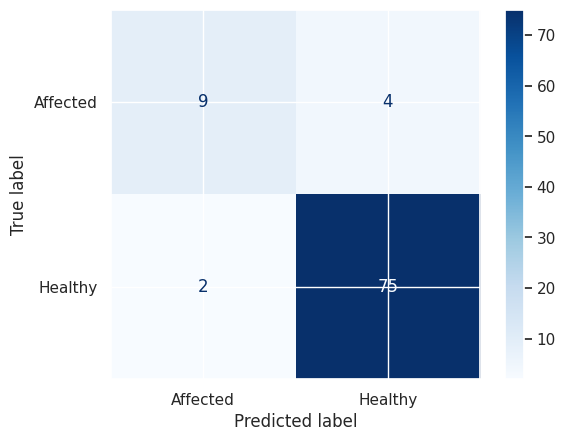

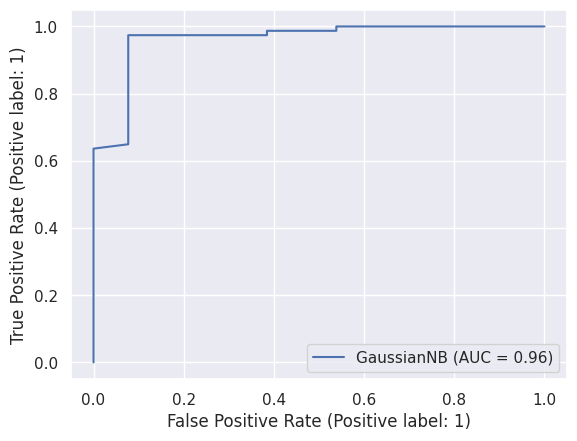

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

KNeighborsClassifier

Accuracy score:  0.9111111111111111
F1 score:  0.9506172839506173
Precision score:  0.9058823529411765
Recall score:  1.0


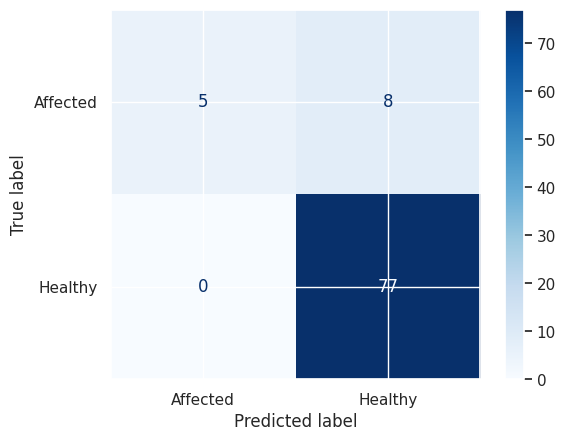

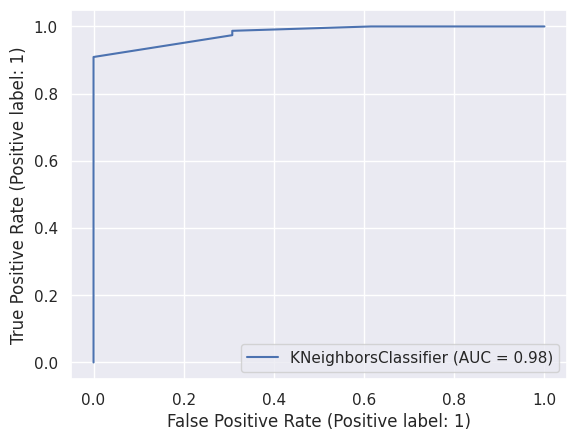

In [ ]:
neigh = KNeighborsClassifier(leaf_size = 1, n_neighbors = 11,p = 1)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

RandomForestClassifier

Accuracy score:  0.9222222222222223
F1 score:  0.9565217391304348
Precision score:  0.9166666666666666
Recall score:  1.0


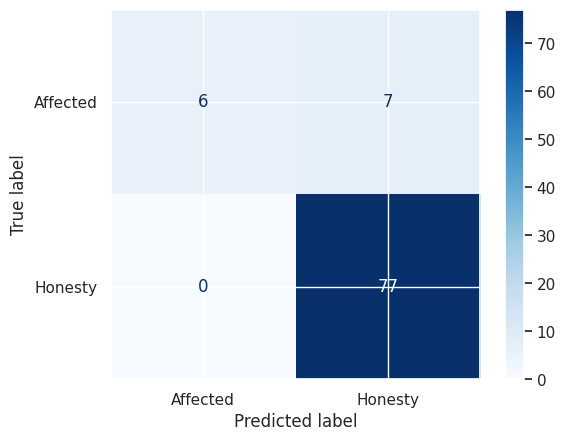

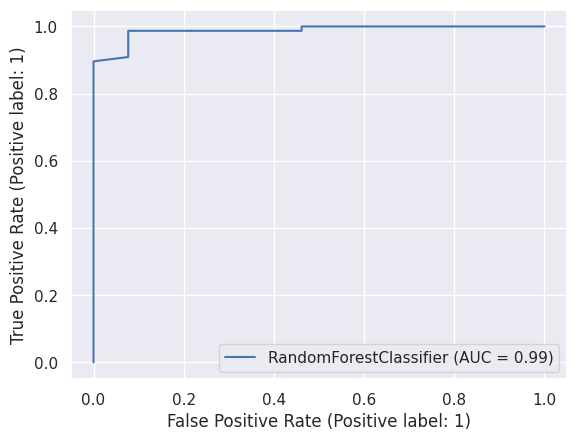

In [ ]:
rf = RandomForestClassifier(max_depth = 4,random_state = 0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Honesty'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

DecisionTreeClassifier

Accuracy score:  0.9111111111111111
F1 score:  0.95
Precision score:  0.9156626506024096
Recall score:  0.987012987012987


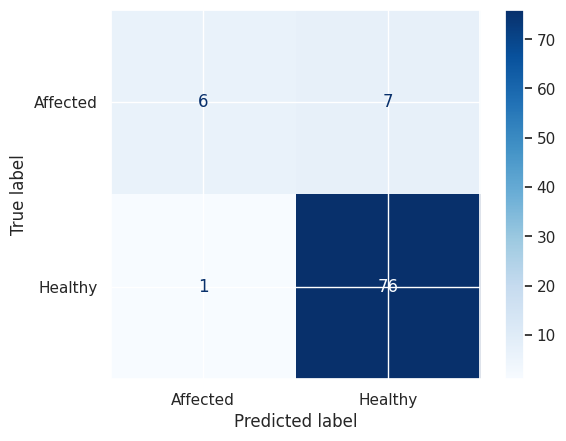

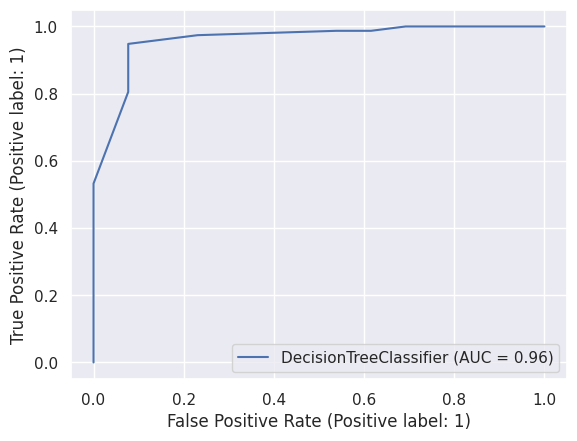

In [ ]:
dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)